<a href="https://colab.research.google.com/github/adindasyv/2141720096-machinelearning-2023/blob/master/Week12/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ADINDA WAHYU LUCHMANSYAHVIRA <BR>
2141720096

# TUGAS PRAKTIKUM


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

2. Lakukan face detection untuk imgae object lain yang tersedia pada images/facedet.
Tampilkan seperti pada contoh berikut.

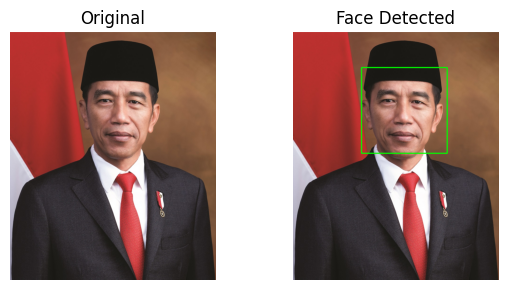

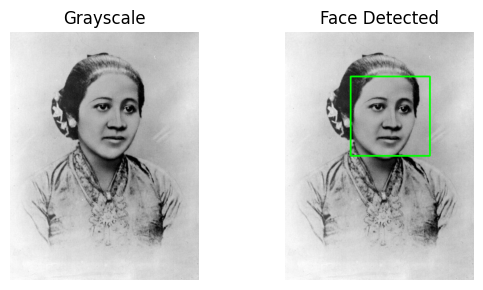

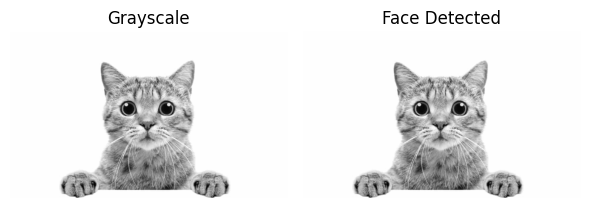

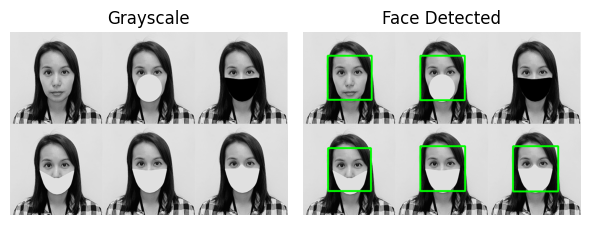

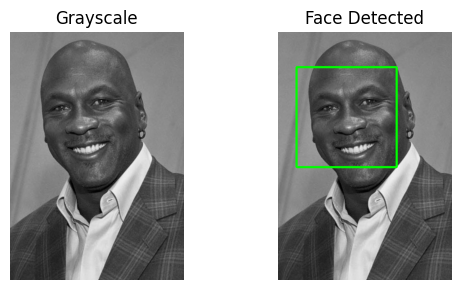

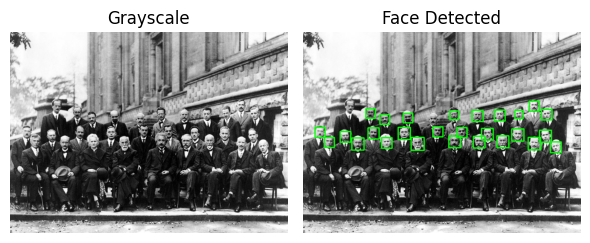

In [21]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

# Load the face cascade classifier
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcascades/haarcascade_frontalface_alt.xml')

# Path to the folder containing the images
folder_path = '/content/drive/MyDrive/Colab Notebooks/facedet'

# List of image filenames you want to display
image_filenames = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

# Iterate over the specified image filenames
for filename in image_filenames:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, filename)

    # Read the image in grayscale for non-'jokowi.jpg' images
    if 'jokowi.jpg' != filename:
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    else:
        # Read the original image in color for 'jokowi.jpg'
        image = cv.imread(image_path)

    # Convert the image to RGB for displaying with Matplotlib
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Detect faces in the image
    roi_wajah = cascade_wajah.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)

    # Create a subplot to display original and processed images
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))

    # Display the original image
    axes[0].imshow(image_rgb)
    axes[0].set_title('Original' if 'jokowi.jpg' == filename else 'Grayscale')
    axes[0].axis('off')

    # Draw rectangles around the detected faces (green color)
    image_with_rect = image_rgb.copy()
    for (x, y, w, h) in roi_wajah:
        cv.rectangle(image_with_rect, (x, y), (x+w, y+h), (0, 255, 0), 3)

    # Display the processed image with the detected faces
    axes[1].imshow(image_with_rect)
    axes[1].set_title('Face Detected')
    axes[1].axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

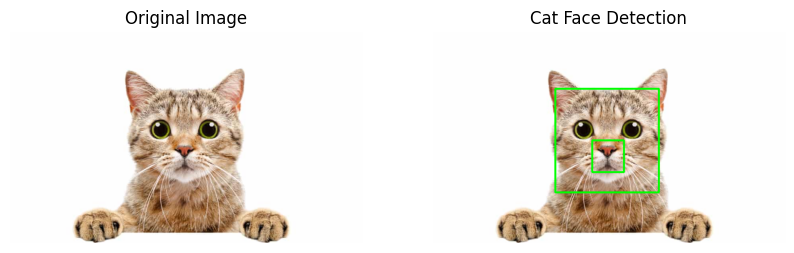

In [16]:
# Load the cat image
kucing = cv.imread('/content/drive/MyDrive/Colab Notebooks/facedet/kucing.jpg')

# Create a copy for face detection
kucing_face_detected = kucing.copy()

# Your cat face cascade for detection
cascade_kucing = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalcatface.xml")

# Detect faces in the 'kucing' image
roi_wajah_kucing = cascade_kucing.detectMultiScale(kucing_face_detected)

# Draw rectangles around the detected cat faces
for (x, y, w, h) in roi_wajah_kucing:
    cv.rectangle(kucing_face_detected, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display the original 'kucing' image and image with cat face detection
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(kucing, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(kucing_face_detected, cv.COLOR_BGR2RGB))
ax[1].set_title('Cat Face Detection')
ax[1].axis('off')

plt.show()


4. Cobakan juga untuk eyes detection.

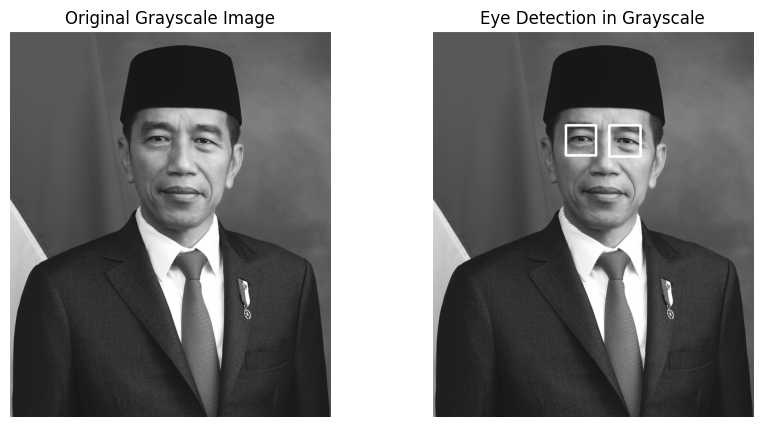

In [22]:
# Load the image
jokowi = cv.imread('/content/drive/MyDrive/Colab Notebooks/facedet/jokowi.jpg')
jokowi_face_detected = jokowi.copy()

# Detect faces
roi_wajah = cascade_wajah.detectMultiScale(jokowi_face_detected)

# Your eye cascade for eye detection
cascade_mata = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")

# For each face, detect eyes and draw rectangles around the eyes
for (x, y, w, h) in roi_wajah:
    face_roi = jokowi_face_detected[y:y+h, x:x+w]  # Extract the face region
    eyes = cascade_mata.detectMultiScale(face_roi)

    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(face_roi, (ex, ey), (ex+ew, ey+eh), (255, 255, 255), 5)

# Convert the 'jokowi_face_detected' image to grayscale
jokowi_face_detected_gray = cv.cvtColor(jokowi_face_detected, cv.COLOR_BGR2GRAY)

# Display the original 'jokowi' image in grayscale and the 'jokowi_face_detected' image with eye detection in grayscale
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY), cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(jokowi_face_detected_gray, cmap='gray')
ax[1].set_title('Eye Detection in Grayscale')
ax[1].axis('off')

plt.show()

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60


In [26]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

## Helper Functions
Below are a few helper function to make converting between different image data types and formats.

In [27]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

## Haar Cascade Classifier
For this tutorial we will run a simple object detection algorithm called Haar Cascade on our images and video fetched from our webcam. OpenCV has a pre-trained Haar Cascade face detection model.

In [28]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

## Webcam Images
Running code on images taken from webcam is fairly straight-forward. We will utilize code within Google Colab's **Code Snippets** that has a variety of useful code functions to perform various tasks.

We will be using the code snippet for **Camera Capture** to utilize your computer's webcam.

In [29]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


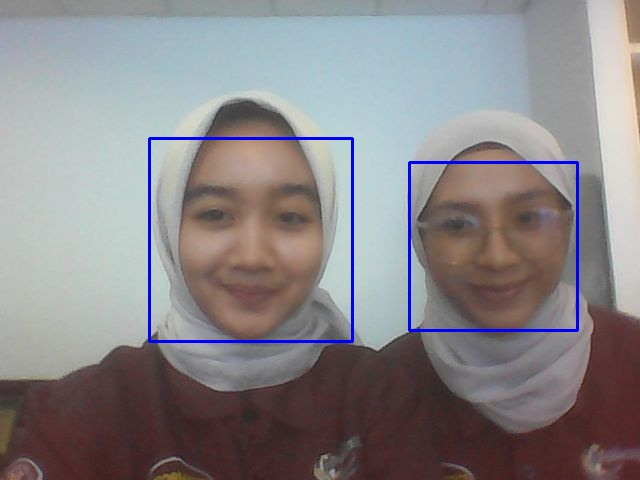

In [34]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Webcam Videos
Running code on webcam video is a little more complex than images. We need to start a video stream using our webcam as input. Then we run each frame through our progam (face detection) and create an overlay image that contains bounding box of detection(s). We then overlay the bounding box image back onto the next frame of our video stream.

In [35]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [36]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

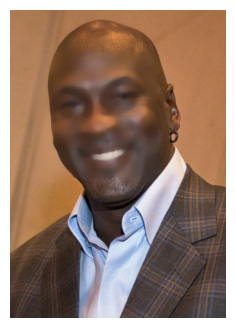

In [43]:
# Load the face cascade classifier
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcascades/haarcascade_frontalface_alt.xml')

# Load the image
jordan = cv.imread('/content/drive/MyDrive/Colab Notebooks/facedet/mjordan.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(jordan, cv.COLOR_BGR2GRAY)

# Detect faces in the image
roi_wajah = cascade_wajah.detectMultiScale(gray)

# Iterate over the detected faces
for (x, y, w, h) in roi_wajah:
    # Crop the face region
    face_roi = jordan[y:y+h, x:x+w]

    # Apply median blur to the face region
    blurred_face = cv.medianBlur(face_roi, 15)

    # Replace the face region with the blurred face
    jordan[y:y+h, x:x+w] = blurred_face

# Display the image with the blurred faces
plt.figure(figsize=(8, 4))
plt.imshow(cv.cvtColor(jordan, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

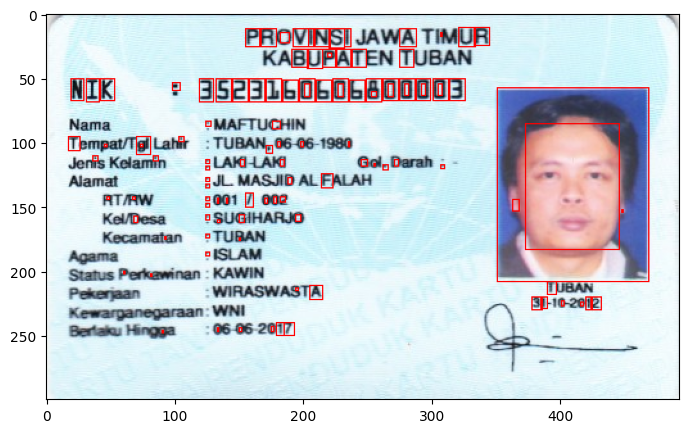

In [44]:
# load data
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/ktp pcvk/ktp3.png')


blurred = cv.GaussianBlur(img, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut


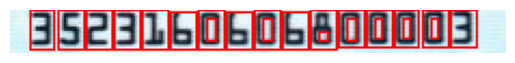

In [48]:
# Koordinat cropping
crop_y_start = 50
crop_y_end = 70
crop_x_start = 110
crop_x_end = 340

# Melakukan cropping pada gambar
cropped_image = img[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

# Menampilkan gambar hasil cropping
plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [51]:
import numpy as np
import pickle
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
width, height = 28, 28

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Combine features and labels into a list
training_data = list(zip(train_images, train_labels))

# Shuffle the training data
random.shuffle(training_data)

# Separate features and labels
X, Y = zip(*training_data)

# Convert to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()


11490434/11490434 [==============================] - 0s 0us/step


10. Lakukan Training Data


In [52]:
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load data from pickle files
with open("X.pickle", "rb") as file:
    X = pickle.load(file)

with open("Y.pickle", "rb") as file:
    Y = pickle.load(file)

# Create a simple convolutional neural network (CNN) model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, Y, epochs=5, validation_split=0.2)

# Save the trained model
model.save("mnist_model.h5")

Epoch 1/5
1500/1500 [==============================] - 29s 17ms/step - loss: 0.2315 - accuracy: 0.9348 - val_loss: 0.1069 - val_accuracy: 0.9689
Epoch 2/5
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0876 - accuracy: 0.9745 - val_loss: 0.0977 - val_accuracy: 0.9704
Epoch 3/5
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0656 - accuracy: 0.9814 - val_loss: 0.0800 - val_accuracy: 0.9748
Epoch 4/5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0550 - accuracy: 0.9840 - val_loss: 0.0730 - val_accuracy: 0.9790
Epoch 5/5
1500/1500 [==============================] - 23s 16ms/step - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0714 - val_accuracy: 0.9794


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11. Testing Data

In [55]:
import pickle
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST test dataset
(_, _), (test_images, test_labels) = mnist.load_data()
width, height = 28, 28

test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
test_labels = to_categorical(test_labels)

# Combine features and labels into a list
testing_data = list(zip(test_images, test_labels))

# Shuffle the testing data
random.shuffle(testing_data)

# Separate features and labels
X_test, Y_test = zip(*testing_data)

# Convert to NumPy arrays
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Tulis ke file pickle
pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle", "wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

In [56]:
import pickle
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("mnist_model.h5")

# Load the testing data from pickle files
with open("X_test.pickle", "rb") as file:
    X_test = pickle.load(file)

with open("Y_test.pickle", "rb") as file:
    Y_test = pickle.load(file)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.0586 - accuracy: 0.9818
Test Accuracy: 0.9818000197410583


# TUGAS

In [57]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 8 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (5,646 kB/s)
debconf: unable to init

<ipython-input-86-c29e497aff62>:58: UserWarning: Glyph 12 () missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


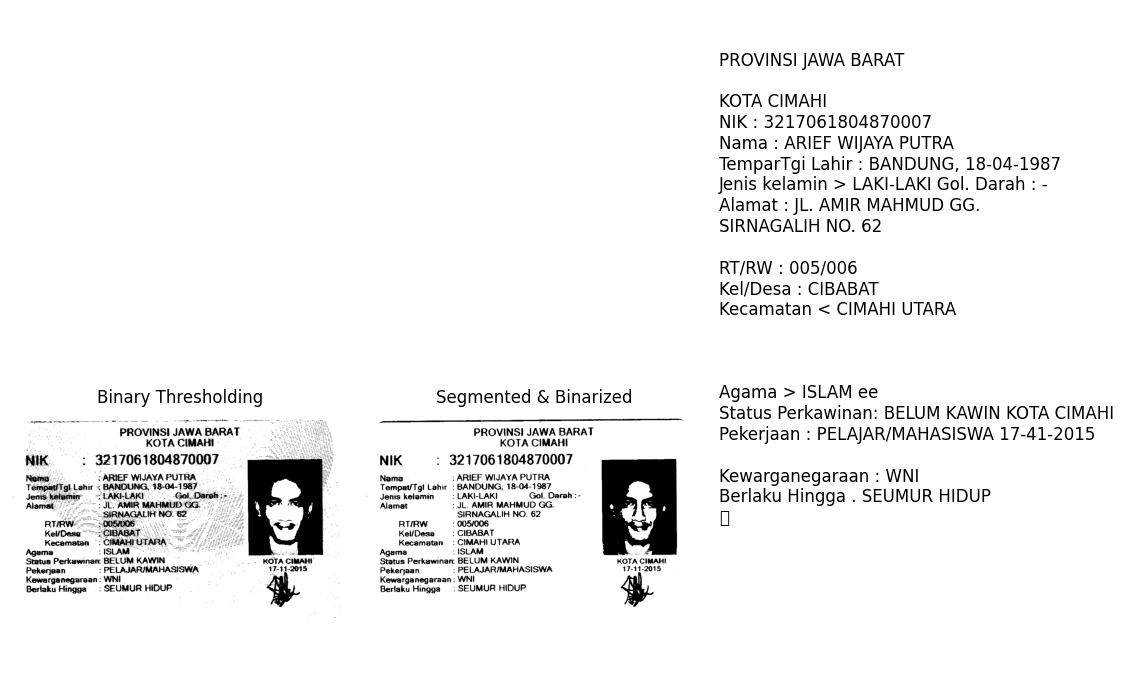

In [86]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract

# Load gambar berwarna
image_path = '/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/ktp pcvk/ktp2.png'
color_image = cv2.imread(image_path)

# Langkah 1: Binary Thresholding
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
_, binary_thresholded = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Langkah 2: Segmentasi K-Means
pixel_values = color_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
k = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(color_image.shape)

# Langkah 3: Konversi Biner
gray_segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
_, binarized_segmented_image = cv2.threshold(gray_segmented_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Simpan gambar hasil Binary Thresholding dan hasil konversi biner sebagai file gambar terpisah
cv2.imwrite('binary_thresholded_image.jpg', binary_thresholded)
cv2.imwrite('binarized_segmented_image.jpg', binarized_segmented_image)

# Langkah 4: Ekstraksi Teks Menggunakan Pytesseract
extracted_text = pytesseract.image_to_string(binarized_segmented_image)

# Tampilkan gambar dan teks hasil ekstraksi
plt.figure(figsize=(12, 6))

# Gambar hasil Binary Thresholding
plt.subplot(1, 3, 1)
plt.imshow(binary_thresholded, cmap='gray')
plt.title('Binary Thresholding')
plt.axis('off')

# Gambar hasil segmentasi K-Means yang telah dikonversi ke biner
plt.subplot(1, 3, 2)
plt.imshow(binarized_segmented_image, cmap='gray')
plt.title('Segmented & Binarized')
plt.axis('off')

# Teks hasil ekstraksi
plt.subplot(1, 3, 3)
plt.text(0, 0.5, extracted_text, fontsize=12)
# plt.title('Extracted Text')
plt.axis('off')

plt.tight_layout()
plt.show()